## Business understanding

In recent years, I've seen a few programs and communities directed at women in tech, STEM or data science. Clearly there has been quite an effort to encourage women to be more involved in the tech field. But, are women developers still disadvantaged at the workplace because they receive lower pay?  

In addition, in the developers' world, we see so many types of different developers, such as front end, back end, web developer, desk top developer, and developers with more math and data understanding. It seems that the developers I know generally enjoy their careers. But is their career satisfaction related to the type of development work they do?  

Online communities are important for developers to learn new skills by discussing and editing their code. Stack Overflow is a source I frequently consult when I am stuck at a particular problem when I program. I use it mostly to debug my coding and find a solution to a coding problem. Is it the same for other people who use it?

## Data understanding

Each year since 2011, Stack Overflow has been asking software developers about the preferences of their work, coding habits, technologies used and career developement. These surveys provide a rich set of questions and in year 2017 over 64,000 developers took the annual survey. 
I will use the Stack Overflow 2017 Survey data to answer the above questions about developers' work and career.

In [2]:
# import python pacakges to be used
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

# import data and take a quick look at the first few rows.

df = pd.read_csv('/Users/ruowei/Desktop/Udacity learning/so-survey-2017/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Show the structure of the dataset.
print(df.shape[0]) # provide number of rows in the dataset
print(df.shape[1]) # provide number of columns in the dataset

51392
154


In [22]:
# Show column names 
print(df.columns.values)

['Respondent' 'Professional' 'ProgramHobby' 'Country' 'University'
 'EmploymentStatus' 'FormalEducation' 'MajorUndergrad' 'HomeRemote'
 'CompanySize' 'CompanyType' 'YearsProgram' 'YearsCodedJob'
 'YearsCodedJobPast' 'DeveloperType' 'WebDeveloperType'
 'MobileDeveloperType' 'NonDeveloperType' 'CareerSatisfaction'
 'JobSatisfaction' 'ExCoderReturn' 'ExCoderNotForMe' 'ExCoderBalance'
 'ExCoder10Years' 'ExCoderBelonged' 'ExCoderSkills' 'ExCoderWillNotCode'
 'ExCoderActive' 'PronounceGIF' 'ProblemSolving' 'BuildingThings'
 'LearningNewTech' 'BoringDetails' 'JobSecurity' 'DiversityImportant'
 'AnnoyingUI' 'FriendsDevelopers' 'RightWrongWay' 'UnderstandComputers'
 'SeriousWork' 'InvestTimeTools' 'WorkPayCare' 'KinshipDevelopers'
 'ChallengeMyself' 'CompetePeers' 'ChangeWorld' 'JobSeekingStatus'
 'HoursPerWeek' 'LastNewJob' 'AssessJobIndustry' 'AssessJobRole'
 'AssessJobExp' 'AssessJobDept' 'AssessJobTech' 'AssessJobProjects'
 'AssessJobCompensation' 'AssessJobOffice' 'AssessJobCommute'
 'Asse

In [15]:
# show column descriptions:
# for this we need to link to the separate schema dataset
schema = pd.read_csv('/Users/ruowei/Desktop/Udacity learning/so-survey-2017/survey_results_schema.csv')
def col_desc(col_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            col_name - string - the name of the column
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == col_name]['Question'])[0]
    return desc

In [16]:
for col in df.columns:
    print(col_desc(col))

Respondent ID number
Which of the following best describes you?
Do you program as a hobby or contribute to open source projects?
In which country do you currently live?
Are you currently enrolled in a formal, degree-granting college or university program?
Which of the following best describes your current employment status?
Which of the following best describes the highest level of formal education that you've completed?
Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
How often do you work from home or remotely?
In terms of the number of employees, how large is the company or organization you work for?
Which of the following best describes the type of company or organization you work for?
How long has it been since you first learned how to program?
For how many years have you coded as part of your job?
For how many years did you code as part of your job?
Which of the following best describe you?
Which

What are the missing patterns for the variables? I want to have a visual display of the missing patterns of the dataset. 

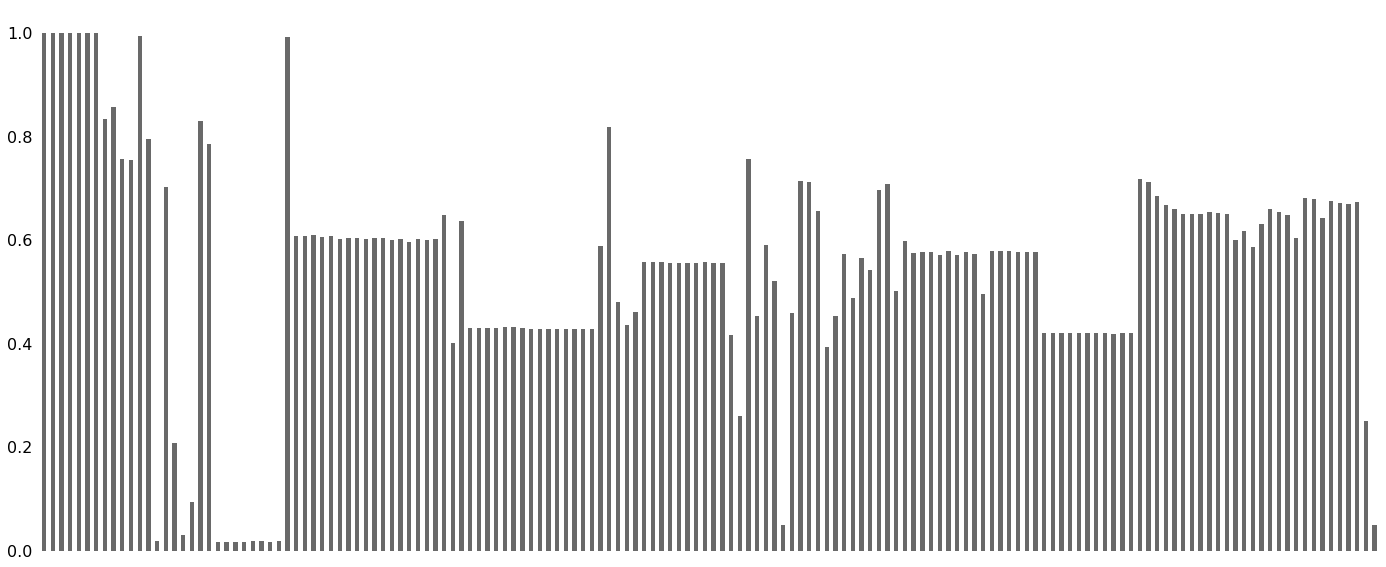

In [18]:
# install the missingno package: pip install missingno in command line
import missingno as msno 

# bar chart of missing values across the dataset
msno.bar(df)

It seems that there are variables existing in the dataset that can answer my questions. There is a gender variable, variables about salary and expected salary, developer type and a series of questions about what developers do on Stack Overflow. However, the missingness for a lot of variables are quite high, so missing values need to be addressed or handled.

## Prepare data and evaluate results
### Question 1: Is there a gender gap in terms of salary for developers?


Examine the gender variable.

In [73]:
# Produce a bar chart of different gender types
df.Gender.value_counts()

Male                                                       31589
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                                 29
Male; Female                                                  15
Male; Female; Transgender; Gender non-conforming; Other       15
Transgender; Gender non-conforming                            15
Male; Transgender                                             11
Female; Transgender; Gender non-conforming                     8
Male; Female; Transgender; Gender non-conforming               7
Male; Female; Transgender

It looks like that there are many complicated/combined entries with more than one value. For the following I will only look at those identify as either male or female.

In [74]:
# Subset the dataset to those who answered either "female" or "male"
gender_new = df.loc[df['Gender'].isin(['Male', 'Female'])]

# provide the percentage of males and females
gender_dis = gender_new.Gender.value_counts()
print(gender_dis/gender_new.shape[0])

Male      0.923952
Female    0.076048
Name: Gender, dtype: float64


Female devleopers only represent 7%. Next I'll produce the mean salary between males and females.

Gender
Female    58083.924534
Male      56996.494293
Name: Salary, dtype: float64


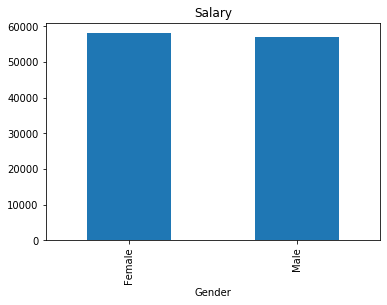

In [21]:
# show mean salaries for males and females
gender_sal = gender_new['Salary'].gender_newgroupby(gender_new["Gender"]).mean()
print(gender_sal)
(gender_sal).plot(kind="bar");
plt.title("Salary");

I'm a bit suprised that females earn more than males (58083 vs. 56996).
Although the gap is pretty small. Is this statistically significant?

In [39]:
# drop missing values of salary
gender_salary = gender_new.dropna(subset=['Salary'], how='any')

In [40]:
# perform t-test
from scipy.stats import ttest_ind
ttest_ind(*gender_salary.groupby('Gender')['Salary'].apply(lambda x:list(x)))

Ttest_indResult(statistic=0.7564769929054644, pvalue=0.4493787807516285)

The p-value is 0.45 therefore the pay difference is not statistically significantly different for males and females.

What about expected salary? Can this be used as a proxy?

Gender
Female    29830.759637
Male      33786.512090
Name: ExpectedSalary, dtype: float64


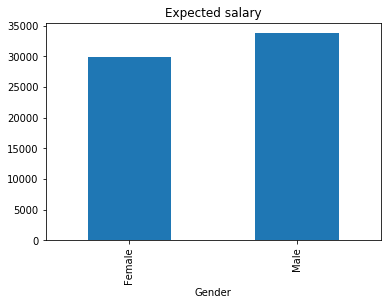

In [41]:
# show mean expected salaries for males and females
expected_salary = gender_new['ExpectedSalary'].groupby(gender_new["Gender"]).mean()
print(expected_salary)
(expected_salary).plot(kind="bar");
plt.title("Expected salary");

In [43]:
# perform t-test
gender_expsalary = gender_new.dropna(subset=['ExpectedSalary'], how='any')
from scipy.stats import ttest_ind
ttest_ind(*gender_expsalary.groupby('Gender')['ExpectedSalary'].apply(lambda x:list(x)))

Ttest_indResult(statistic=-1.6093288829852075, pvalue=0.10769864137504766)

Again the difference was not statistically significant. 

From the above we can see that females expect less salary than males, however they might tend to earn slightly more. Caution should be taken though, because people tend not to respond to questions about financial data like salary. Let's examine the missing patterns by gender.

In [80]:
# config to print all outputs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# display missing patterns by gender of salary and expected salary
gender_new.groupby('Gender')['Salary'].apply(lambda x: x.isnull().sum()/len(x))
gender_new.groupby('Gender')['ExpectedSalary'].apply(lambda x: x.isnull().sum()/len(x))

Gender
Female    0.685000
Male      0.662351
Name: Salary, dtype: float64

Gender
Female    0.938846
Male      0.940169
Name: ExpectedSalary, dtype: float64

It seems that males and females display similar patterns of nonresponse, with more people not providing expected salary. 

### Question 2: Which developer types have the highest career satisfaction?

First I'll take a look at the distribution of career satisfaction by developer type.

In [81]:
# show career satisfaction by developer type
grouped = df['CareerSatisfaction'].groupby(df["DeveloperType"]).mean().reset_index()
# sort by career satisfaction
grouped = grouped.sort_values('CareerSatisfaction', ascending = False)
print(grouped)

                                          DeveloperType  CareerSatisfaction
910   Web developer; Embedded applications/devices d...                10.0
569   Mobile developer; Graphics programming; Machin...                10.0
561   Mobile developer; Graphics programming; Develo...                10.0
559   Mobile developer; Graphics programming; Develo...                10.0
1241  Web developer; Mobile developer; Database admi...                10.0
...                                                 ...                 ...
1305  Web developer; Mobile developer; Developer wit...                 NaN
1458  Web developer; Mobile developer; Embedded appl...                 NaN
1538  Web developer; Mobile developer; Embedded appl...                 NaN
1566  Web developer; Mobile developer; Embedded appl...                 NaN
1711  Web developer; Mobile developer; Graphics prog...                 NaN

[1823 rows x 2 columns]


Because the variable DeveloperType allows multiple values for a single person, it means that there are many many different combinations of types, and the above list doesn't provide much useful information because the type is too specific. For example, a person can be a mobile developer, web developer and database administrator, the next person can be a mobile developer, web developer and embedded applications/device devloper, although the two people have some overlap of job functions, they are categorized differently. 

In [83]:
# check missing data of the developer type variable
df["DeveloperType"].isnull().mean()

0.29706958281444584

There is 29% missing for the developer type variable. However, because it is categorized in such a specific way, I decided dropping instead of imputing the missing values.

Because there are too many unique values of the developer type variable, it would be hard to visualize career satisfaction by type. I will reorganize the data so that the first type in any entry is assumed to be the primary developer type.

In [84]:
# create the variable 'primary_dev_type' to 
# inidicate the first string in the DeveloperType variable

df['Primary_dev_type'] = df['DeveloperType'].str.split(';').str[0]

In [134]:
# Produce list of career satisfaction by primary devloper type:
grouped1= df['CareerSatisfaction'].groupby(df["Primary_dev_type"]).mean().reset_index()
grouped1 = grouped1.sort_values('CareerSatisfaction', ascending = False)
print(grouped1)

                                     Primary_dev_type  CareerSatisfaction
8                         Machine learning specialist            7.628866
9                                    Mobile developer            7.495213
10                                              Other            7.479346
13                                      Web developer            7.439885
7                                Graphics programming            7.424437
3                                   DevOps specialist            7.411255
5             Embedded applications/devices developer            7.389564
12                              Systems administrator            7.300000
0                                      Data scientist            7.240991
4   Developer with a statistics or mathematics bac...            7.233498
1                              Database administrator            7.207143
2                      Desktop applications developer            7.201735
11                         Quality ass

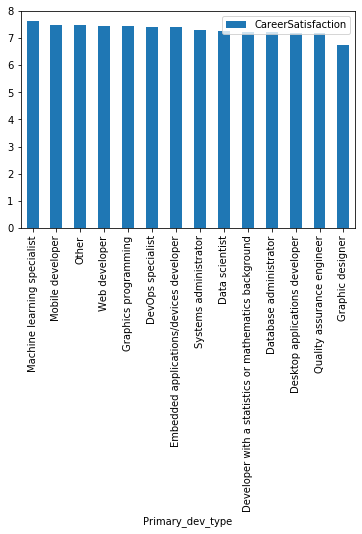

In [135]:
# Plot career satisfaction by primary devloper type:
grouped1.set_index("Primary_dev_type",drop=True,inplace=True)
(grouped1).plot(kind="bar");

It appears that those identify mostly as machine learning specialists have the highest career satisfaction, followed by mobile developers, other developers, and web developers and so on. However, the career satisfaction rating does not differ much since the range between the lowest and the highest is pretty narrow (lowest: 6.75 for graphic desginer; highest: 7.63 for machine learning specialist)

### Question 3: What kind of activities developers most frequently do on Stack Overflow?

There are eight questions asked in the SO survey in terms of how frequently developers perform certain activities over the last three months on the SO website: 
* Found an answer that solved my coding problem
* Copied a code example and pasted it into my codebase
* Seen a job listing I was interested in
* Researched a potential employer by visiting its company page
* Searched for jobs
* Asked a new question
* Written a new answer to someone else's question
* Participated in community discussions on meta or in chat

In [39]:
# select columns about the SO activity questions
df1 = df[["StackOverflowFoundAnswer", "StackOverflowCopiedCode", 
              "StackOverflowJobListing", "StackOverflowCompanyPage",
              "StackOverflowJobSearch", "StackOverflowNewQuestion",
              "StackOverflowAnswer", "StackOverflowMetaChat"]]

In [33]:
# check missing values of the above variables
df1.isnull().mean()

StackOverflowFoundAnswer    0.332776
StackOverflowCopiedCode     0.340189
StackOverflowJobListing     0.348770
StackOverflowCompanyPage    0.349412
StackOverflowJobSearch      0.349802
StackOverflowNewQuestion    0.345851
StackOverflowAnswer         0.347058
StackOverflowMetaChat       0.349957
dtype: float64

There is at least 30% missing for each of these items. However, if I fill the values with mode or the most freuqently occurring value, it would only inflate that value. I decided to ignore missing values in this case.

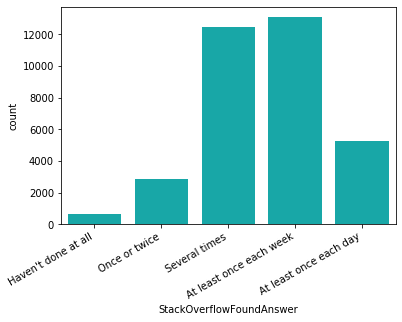

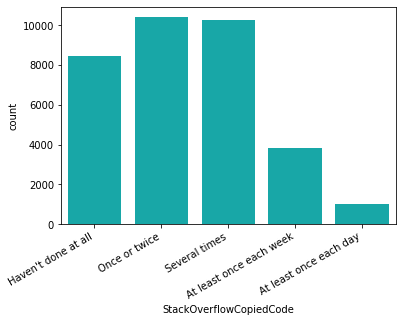

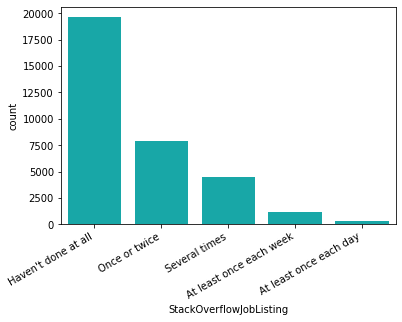

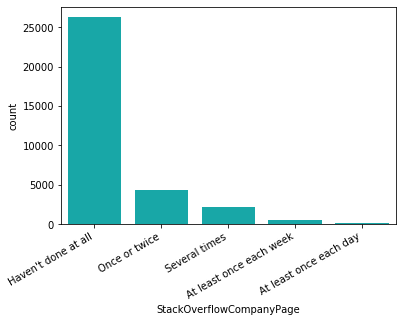

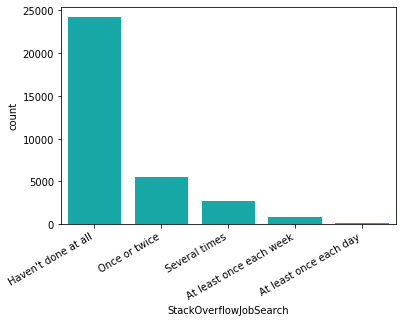

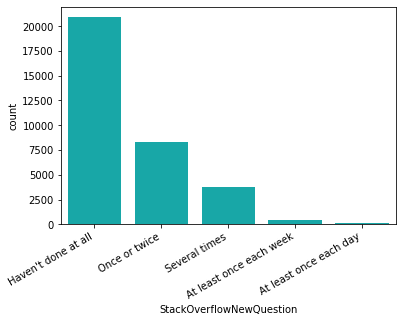

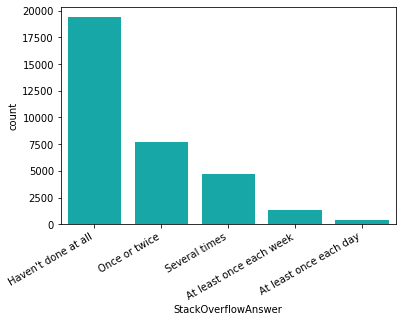

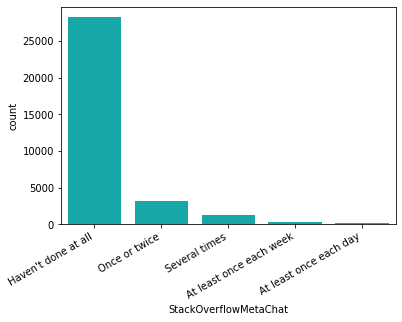

In [40]:
# plot each activity
import seaborn as sns
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, order=["Haven't done at all",'Once or twice','Several times','At least once each week','At least once each day'], data=df1, color = 'c')
    plt.xticks(rotation=30, horizontalalignment='right')

### Conclusion
The most popular activity seems to be finding an answer that solves a coding problem, with the majority of respondents engaging in it at least once each week. The second is copying code, as most did this once or twice, or several times in the past. The remaining activities don't seem to be so popular since most developers haven't done it at all.

## Deploy


Conclusions from the above analysis:

In summary:
1. Is there a gender gap in terms of salary for developers?  

Female developers also earn slightly more than males, they nevertheless report less expected salary. However, these are only trends, not significant differences. Females might be at a disadvantage in terms of equal pay as developers because they expect less salary to start with.

2. Which developer types have the highest career satisfaction?  

Developers tend to wear multiple hats so usually they wouldn't identify as a single type of developer. Assuming the first type they answered is their primary type, it seems that career satisfaction doesn't differ much for different types.

3. What kind of activities developers most frequently do on Stack Overflow?

Developers seem to be focused on finding solutions to their coding problem, while ignoring job and career-related features on Stack Overflow.